In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import numpy as np

pd.set_option('display.max_rows', None)

# Cargar los datasets
df_zona = pd.read_csv('C:/Users/Felipe/OneDrive/Escritorio/Mini Projects/Departamentos Buenos Aires/prueba_zona.csv', sep=';', encoding='utf-8-sig')
df_remax = pd.read_csv('C:/Users/Felipe/OneDrive/Escritorio/Mini Projects/Departamentos Buenos Aires/prueba_remax.csv', sep=';', encoding='utf-8-sig')

df_remax['Plataforma'] = 'Remax'
df_zona['Plataforma'] = 'ZonaProp'

df = pd.concat([df_remax, df_zona], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('C:/Users/Felipe/OneDrive/Escritorio/Mini Projects/Departamentos Buenos Aires/prueba_combinada.csv', index=False, sep=';', encoding='utf-8-sig')

df.head()


,Link,Título,Valor Alquiler,Expensas,Barrio,Dirección,Metros Cuadrados,Ambientes,Dormitorios,Baños,Cocheras,Años de Antigüedad,Coordenadas,Descripción,Plataforma
0,https://www.zonaprop.com.ar/propiedades/clasif...,Departamento Duplex de Estilo Antiguo Totalmen...,alquiler USD 1.200,Expensas $ 230.000,Barrio Norte,"Tucuman al 1500, Barrio Norte, Capital Federal",90.0,3.0,NaN,1.0,NaN,100.0,NaN,Tucumán entre Paraná y Montevideo (Barrio Nort...,ZonaProp
1,https://www.zonaprop.com.ar/propiedades/clasif...,Av del Libertador y Ruggeri,alquiler USD 5.000,Expensas $ 1.339.000,Palermo Chico,"Av. del Libertador al 2500, Palermo Chico, Pa...",417.0,8.0,5.0,4.0,1.0,55.0,NaN,"Piso en edificio de estilo francés, ubicado en...",ZonaProp
2,https://www.zonaprop.com.ar/propiedades/clasif...,Alquiler Almagro 2 Ambientes Amplios,alquiler $ 420.000,Expensas $ 80.000,Almagro Norte,"Sarmiento 4075, Almagro Norte, Almagro",40.0,1.0,NaN,NaN,NaN,45.0,NaN,Hermoso departamento 2 ambientes en alquiler e...,ZonaProp
3,https://www.zonaprop.com.ar/propiedades/clasif...,Monoambiente Divisible en Recoleta Al Frente c...,alquiler $ 380.000,Expensas $ 80.000,Barrio Norte,"Anchorena al 1700, Barrio Norte, Capital Federal",32.0,1.0,NaN,1.0,NaN,35.0,NaN,ALQUILER POR 24 MESES Monoambiente divisible e...,ZonaProp
4,https://www.remax.com.ar/listings/alquiler-imp...,ALQUILER IMPERDIBLE 2 AMB -DOBLE BALCON– BELG...,660.000 ARS,200.000 ARS,Belgrano,"José Hernández 2500, Belgrano, Capital Federal",47.0,2.0,1.0,1.0,0.0,14.0,NaN,Alquiler de Semipiso 2 Ambientes con Doble Bal...,Remax


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Link                30 non-null     object 
 1   Título              29 non-null     object 
 2   Valor Alquiler      29 non-null     object 
 3   Expensas            26 non-null     object 
 4   Barrio              28 non-null     object 
 5   Dirección           28 non-null     object 
 6   Metros Cuadrados    30 non-null     float64
 7   Ambientes           28 non-null     float64
 8   Dormitorios         18 non-null     float64
 9   Baños               28 non-null     float64
 10  Cocheras            18 non-null     float64
 11  Años de Antigüedad  27 non-null     float64
 12  Coordenadas         0 non-null      float64
 13  Descripción         29 non-null     object 
 14  Plataforma          30 non-null     object 
dtypes: float64(7), object(8)
memory usage: 3.6+ KB


In [57]:
df.describe(include='all')

,Link,Título,Valor Alquiler,Expensas,Barrio,Dirección,Metros Cuadrados,Ambientes,Dormitorios,Baños,Cocheras,Años de Antigüedad,Coordenadas,Descripción,Plataforma
count,30,29,29,26,28,28,30.000000,28.000000,18.000000,28.000000,18.000000,27.000000,0.0,29,30
unique,30,29,28,24,16,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,2
top,https://www.zonaprop.com.ar/propiedades/clasif...,Departamento Duplex de Estilo Antiguo Totalmen...,550.000 ARS,Expensas $ 80.000,Belgrano,"Tucuman al 1500, Barrio Norte, Capital Federal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tucumán entre Paraná y Montevideo (Barrio Nort...,ZonaProp
freq,1,1,2,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,70.147667,2.285714,1.888889,1.357143,0.333333,32.888889,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,83.383950,1.629750,1.278275,0.869835,0.840168,23.216926,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.327500,1.000000,1.000000,1.000000,0.000000,12.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,43.500000,2.000000,1.000000,1.000000,0.000000,37.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.240000,3.000000,2.000000,1.000000,0.000000,46.000000,NaN,NaN,NaN


In [58]:
df_remax.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Link                15 non-null     object 
 1   Título              14 non-null     object 
 2   Valor Alquiler      14 non-null     object 
 3   Expensas            13 non-null     object 
 4   Barrio              13 non-null     object 
 5   Dirección           13 non-null     object 
 6   Metros Cuadrados    15 non-null     float64
 7   Ambientes           13 non-null     float64
 8   Dormitorios         11 non-null     float64
 9   Baños               14 non-null     float64
 10  Cocheras            15 non-null     int64  
 11  Años de Antigüedad  14 non-null     float64
 12  Coordenadas         0 non-null      float64
 13  Descripción         14 non-null     object 
 14  Plataforma          15 non-null     object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.9+ KB


In [59]:
df_zona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Link                15 non-null     object 
 1   Título              15 non-null     object 
 2   Descripción         15 non-null     object 
 3   Valor Alquiler      15 non-null     object 
 4   Expensas            13 non-null     object 
 5   Barrio              15 non-null     object 
 6   Dirección           15 non-null     object 
 7   Metros Cuadrados    15 non-null     int64  
 8   Ambientes           15 non-null     int64  
 9   Dormitorios         7 non-null      float64
 10  Baños               14 non-null     float64
 11  Cocheras            3 non-null      float64
 12  Años de Antigüedad  13 non-null     float64
 13  Coordenadas         0 non-null      float64
 14  Plataforma          15 non-null     object 
dtypes: float64(5), int64(2), object(8)
memory usage: 1.9+ KB


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Link                30 non-null     object 
 1   Título              29 non-null     object 
 2   Valor Alquiler      29 non-null     object 
 3   Expensas            26 non-null     object 
 4   Barrio              28 non-null     object 
 5   Dirección           28 non-null     object 
 6   Metros Cuadrados    30 non-null     float64
 7   Ambientes           28 non-null     float64
 8   Dormitorios         18 non-null     float64
 9   Baños               28 non-null     float64
 10  Cocheras            18 non-null     float64
 11  Años de Antigüedad  27 non-null     float64
 12  Coordenadas         0 non-null      float64
 13  Descripción         29 non-null     object 
 14  Plataforma          30 non-null     object 
dtypes: float64(7), object(8)
memory usage: 3.6+ KB


**Nulls en "Expensas"**

In [61]:
df.isnull().sum()

Link                   0
Título                 1
Valor Alquiler         1
Expensas               4
Barrio                 2
Dirección              2
Metros Cuadrados       0
Ambientes              2
Dormitorios           12
Baños                  2
Cocheras              12
Años de Antigüedad     3
Coordenadas           30
Descripción            1
Plataforma             0
dtype: int64

### Preprocessing pipeline

In [62]:
import numpy as np
from sklearn.impute import KNNImputer
import requests
import re
import string

# =========================
# 1. FILTROS INICIALES
# =========================
def filtrar_datos_iniciales(df):
    df = df[df['Título'] != 'No disponible']
    df = df[(df['Metros Cuadrados'] >= 15) & (df['Metros Cuadrados'] <= 1000)]
    df = df[df['Valor Alquiler'].str.contains(r'alquiler\s+(USD|\$)', na=False)]
    return df.reset_index(drop=True)


# =========================
# 2. LIMPIEZA DE MONEDA Y VALOR
# =========================
def normalizar_moneda_y_valor(df):
    df['Moneda'] = df['Valor Alquiler'].str.extract(r'alquiler\s+(USD|\$)')
    df['Moneda'] = df['Moneda'].replace({'$': 'ARS', 'USD': 'USD'})

    df['Valor Alquiler'] = df['Valor Alquiler'].str.extract(r'alquiler\s+(?:USD|\$)\s*([\d\.]+)')
    df['Valor Alquiler'] = df['Valor Alquiler'].str.replace('.', '', regex=False)
    df['Valor Alquiler'] = df['Valor Alquiler'].astype(float).astype(int)

    return df



# =========================
# 3. LIMPIEZA DE EXPENSAS
# =========================
def limpiar_expensas(df):
    df['Expensas'] = df['Expensas'].str.extract(r'Expensas\s*\$?\s*([\d\.]+)', expand=False)
    df['Expensas'] = df['Expensas'].str.replace('.', '', regex=False)
    df['Expensas'] = pd.to_numeric(df['Expensas'], errors='coerce')
    return df



# =========================
# 4. OUTLIERS EN ALQUILER
# =========================
def eliminar_outliers_alquiler(df):
    filtro_usd = ~((df['Moneda'] == 'USD') & (df['Valor Alquiler'] > 31000))
    filtro_ars = ~((df['Moneda'] == 'ARS') & ((df['Valor Alquiler'] < 90000) | (df['Valor Alquiler'] > 42000000)))
    df = df[filtro_usd & filtro_ars]
    return df.reset_index(drop=True)


# =========================
# 5. EXTRAER BARRIO
# =========================
def extraer_barrio(ubicacion):
    partes = ubicacion.split(',')
    if len(partes) == 2:
        parte_1 = partes[0].strip()
        parte_2 = partes[1].strip()
        return parte_2 if parte_2 != 'Capital Federal' else parte_1
    return ubicacion.strip()


# =========================
# 6. FILTRAR AMBIENTES Y DORMITORIOS
# =========================
def filtrar_ambientes_y_dormitorios(df):
    df = df[(df['Ambientes'] >= 1) & (df['Ambientes'] <= 10)]
    df = df[~((df['Dormitorios'] == 0) & (df['Ambientes'] > 1))]
    return df.reset_index(drop=True)


# =========================
# 7. IMPUTACIÓN DE BAÑOS
# =========================
def imputar_baños(df):
    df['Baños'] = df['Baños'].replace(0, np.nan)
    imputer = KNNImputer(n_neighbors=5)
    df['Baños'] = imputer.fit_transform(df[['Baños', 'Ambientes', 'Metros Cuadrados', 'Dormitorios', 'Valor Alquiler']])[:, 0]
    df['Baños'] = df['Baños'].round().astype(int)
    return df


# =========================
# 8. NORMALIZACIÓN DE VALOR EN ARS
# =========================
def obtener_dolar_oficial():
    response = requests.get("https://dolarapi.com/v1/dolares/oficial")
    if response.status_code == 200:
        return response.json()['venta']
    raise Exception("No se pudo obtener la cotización del dólar")

def normalizar_valor_y_filtrar(df):
    cotizacion_dolar = obtener_dolar_oficial()
    df['Valor Alquiler(normalizado)'] = np.where(
        df['Moneda'] == 'USD',
        df['Valor Alquiler'] * cotizacion_dolar,
        df['Valor Alquiler']
    )
    df = df[(df['Valor Alquiler(normalizado)'] > 90000) & (df['Valor Alquiler(normalizado)'] < 42_000_000)]
    return df.reset_index(drop=True)


# =========================
# 9. DETECCIÓN DE AMOBLADO
# =========================
regex_negativos = [
    r"sin\s+muebles", r"no\s+amoblado", r"sin\s+amoblar", r"no\s+amueblado",
    r"no\s+equipado", r"no\s+tiene\s+muebles", r"no\s+contiene\s+muebles",
    r"no\s+incluye\s+muebles", r"no\s+incluye\s+amoblamiento",
    r"no\s+incluye\s+equipamiento", r"no\s+amoblamiento", r"no\s+equipamiento",
    r"sin\s+amoblamiento", r"sin\s+amueblamiento",
]

regex_positivos = [
    r"amoblado", r"amueblado", r"amoblamientos", r"amoblamiento",
    r"con\s+muebles", r"totalmente\s+equipado", r"full\s+equipado",
    r"\bmuebles\b", r"mobiliario\s+incluido",
]

contextos_que_no_cuentan = [
    r"muebles\s+(inferiores|superiores|de cocina|de baño|de guardado|bajo\s+mesada)",
    r"mueble\s+(adicional|de guardado|bajo\s+mesada|en\s+baño)",
    r"\bplacard\b", r"\balacena\b", r"mueble\s+fijo",
]

def hay_muebles_en_contexto(texto, palabra_base="mueble", contextos=["cocina", "baño", "mesada", "guardado"], ventana=8):
    palabras = texto.split()
    for i, palabra in enumerate(palabras):
        if palabra_base in palabra:
            contexto = palabras[max(i - ventana, 0):min(i + ventana + 1, len(palabras))]
            if any(ctx in contexto for ctx in contextos):
                return True
    return False

def limpiar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

def detectar_amoblado(titulo, descripcion):
    texto = f"{titulo} {descripcion}".lower()
    texto = limpiar_puntuacion(texto)

    if "con o sin muebles" in texto:
        return 1

    if hay_muebles_en_contexto(texto):
        texto = texto.replace("muebles", "").replace("mueble", "")

    for patron in contextos_que_no_cuentan:
        texto = re.sub(patron, "", texto)

    for patron_neg in regex_negativos:
        if re.search(patron_neg, texto):
            return 0

    for patron_pos in regex_positivos:
        if re.search(patron_pos, texto):
            return 1

    return 0

def detectar_amoblado_df(df):
    df["Amoblado"] = df.apply(lambda row: detectar_amoblado(row["Título"], row["Descripción"]), axis=1)
    return df

# =========================
# CONVERSIÓN A ENTEROS
# =========================
def convertir_a_enteros(df):
    columnas_a_convertir = [
        'Expensas', 'Ambientes', 'Dormitorios',
        'Años de Antigüedad', 'Cocheras', 'Metros Cuadrados'
    ]
    for col in columnas_a_convertir:
        if col in df.columns:
            df[col] = df[col].astype('Int64')
    return df




# =========================
# FUNCIÓN MAESTRA DE LIMPIEZA
# =========================
def limpiar_df(df):
    df.replace('', np.nan, inplace=True)
    df = filtrar_datos_iniciales(df)
    df = normalizar_moneda_y_valor(df)
    df = limpiar_expensas(df)
    df = eliminar_outliers_alquiler(df)
    df = filtrar_ambientes_y_dormitorios(df)
    df = imputar_baños(df)
    df = normalizar_valor_y_filtrar(df)
    df = detectar_amoblado_df(df)
    df = convertir_a_enteros(df)
    return df

df = limpiar_df(df)
df

C:\Users\Felipe\AppData\Local\Temp\ipykernel_18548\1397376725.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['Valor Alquiler'].str.contains(r'alquiler\s+(USD|\$)', na=False)]
c:\Users\Felipe\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Felipe\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,Link,Título,Valor Alquiler,Expensas,Barrio,Dirección,Metros Cuadrados,Ambientes,Dormitorios,Baños,Cocheras,Años de Antigüedad,Coordenadas,Descripción,Plataforma,Moneda,Valor Alquiler(normalizado),Amoblado
0,https://www.zonaprop.com.ar/propiedades/clasif...,Departamento Duplex de Estilo Antiguo Totalmen...,1200,230000,Barrio Norte,"Tucuman al 1500, Barrio Norte, Capital Federal",90,3,<NA>,1,<NA>,100,NaN,Tucumán entre Paraná y Montevideo (Barrio Nort...,ZonaProp,USD,1434000,0
1,https://www.zonaprop.com.ar/propiedades/clasif...,Av del Libertador y Ruggeri,5000,1339000,Palermo Chico,"Av. del Libertador al 2500, Palermo Chico, Pa...",417,8,5,4,1,55,NaN,"Piso en edificio de estilo francés, ubicado en...",ZonaProp,USD,5975000,0
2,https://www.zonaprop.com.ar/propiedades/clasif...,Alquiler Almagro 2 Ambientes Amplios,420000,80000,Almagro Norte,"Sarmiento 4075, Almagro Norte, Almagro",40,1,<NA>,1,<NA>,45,NaN,Hermoso departamento 2 ambientes en alquiler e...,ZonaProp,ARS,420000,0
3,https://www.zonaprop.com.ar/propiedades/clasif...,Monoambiente Divisible en Recoleta Al Frente c...,380000,80000,Barrio Norte,"Anchorena al 1700, Barrio Norte, Capital Federal",32,1,<NA>,1,<NA>,35,NaN,ALQUILER POR 24 MESES Monoambiente divisible e...,ZonaProp,ARS,380000,0
4,https://www.zonaprop.com.ar/propiedades/clasif...,Departamento de 2amb Amoblado en Alquiler en P...,800,172000,Palermo,"Jose A Cabrera al 3700, Palermo, Capital Federal",40,2,1,1,<NA>,10,NaN,Departamento de 2amb en alquiler con muebles c...,ZonaProp,USD,956000,1
5,https://www.zonaprop.com.ar/propiedades/clasif...,3 Ambientes con Balcon Al Frente. Muy Luminoso!,700000,200000,Belgrano,"Santos Dumont al 2400, Belgrano, Capital Federal",63,3,2,1,<NA>,30,NaN,FRATELLI GRUPO INMOBILIARIO 11 Ver datos ALQU...,ZonaProp,ARS,700000,0
6,https://www.zonaprop.com.ar/propiedades/clasif...,Departamento en Alquiler Monoambiente Tipo Lof...,695000,158000,Belgrano,"Manuel Ugarte al 1800, Belgrano, Capital Federal",55,1,<NA>,1,<NA>,2,NaN,"Belgrano Gran ubicación, m...",ZonaProp,ARS,695000,0
7,https://www.zonaprop.com.ar/propiedades/clasif...,Alquiler Palermo Fitz Roy Al 1900 Monoamb Apto...,500000,135000,Palermo Hollywood,"Fitz Roy al 1900, Palermo Hollywood, Palermo",31,1,<NA>,1,<NA>,20,NaN,"Alquiler, contrato de dos años ajuste trimestr...",ZonaProp,ARS,500000,0
8,https://www.zonaprop.com.ar/propiedades/clasif...,Alquiler - Departamento - Monoambiente - Belgr...,550000,<NA>,Belgrano,"Montañeses 2200, Belgrano, Capital Federal",29,1,<NA>,1,<NA>,<NA>,NaN,***KARAS PROPIEDADES*** ESPECTACULAR MONOAMBIE...,ZonaProp,ARS,550000,0
9,https://www.zonaprop.com.ar/propiedades/clasif...,Alquiler 2 Ambientes en Puerto Madero Torre La...,990,240000,Puerto Madero,"AZOPARDO 755. Entre Chile y Independencia, Pu...",52,2,1,2,<NA>,10,NaN,ALQUILER 2 AMBIENTES EN PUERTO MADERO EN EDIFI...,ZonaProp,USD,1183050,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         14 non-null     object 
 1   Título                       14 non-null     object 
 2   Valor Alquiler               14 non-null     int32  
 3   Expensas                     12 non-null     Int64  
 4   Barrio                       14 non-null     object 
 5   Dirección                    14 non-null     object 
 6   Metros Cuadrados             14 non-null     Int64  
 7   Ambientes                    14 non-null     Int64  
 8   Dormitorios                  6 non-null      Int64  
 9   Baños                        14 non-null     int32  
 10  Cocheras                     2 non-null      Int64  
 11  Años de Antigüedad           12 non-null     Int64  
 12  Coordenadas                  0 non-null      float64
 13  Descripción           

### Expensas Prediction

In [6]:
df_model = df[df['Expensas'].notnull()].copy()

df_model['Expensas'] = df_model['Expensas'].astype(int)

df_model = df_model[(df_model['Expensas'] >= 25000) & (df_model['Expensas'] <= 1300000)].reset_index(drop=True)


df_model.head()

,Título,Ubicación,Valor Alquiler,Expensas,Metros Cuadrados,Ambientes,Dormitorios,Baños,Cocheras,Moneda,Barrio,Valor Alquiler(normalizado)
0,Bartolomé Mitre al 2200,"Balvanera, Capital Federal",430000,186500,40,1,0,1,1,ARS,Balvanera,430000
1,Presidente Julio A. Roca al 700,"Centro / Microcentro, Capital Federal",430000,252000,46,1,0,1,1,ARS,Centro / Microcentro,430000
2,Scalabrini Ortiz al 1600,"Palermo, Capital Federal",2450000,236000,102,4,3,2,0,ARS,Palermo,2450000
3,Juncal al 800,"Retiro, Capital Federal",1100,521726,142,6,3,3,0,USD,Retiro,1364000
4,Parera al 100,"Recoleta, Capital Federal",3000,1000000,282,7,4,2,1,USD,Recoleta,3720000


In [7]:
barrio_counts = df_model['Barrio'].value_counts()
barrio_frecuentes = barrio_counts[barrio_counts >= 60].index

df_model['Barrio'] = df_model['Barrio'].apply(lambda x: x if x in barrio_frecuentes else 'Otros')


Correlations

In [8]:
df_model[['Ambientes', 'Dormitorios', 'Baños', 'Cocheras', 'Metros Cuadrados', 'Valor Alquiler', 'Expensas', 'Valor Alquiler(normalizado)']].corr()['Expensas'].sort_values(ascending=False)


Expensas                       1.000000
Metros Cuadrados               0.725349
Baños                          0.635555
Valor Alquiler(normalizado)    0.630489
Cocheras                       0.603823
Ambientes                      0.540835
Dormitorios                    0.514147
Valor Alquiler                -0.165870
Name: Expensas, dtype: float64

In [9]:
features = ['Ambientes', 'Dormitorios', 'Baños', 'Cocheras', 'Barrio', 'Moneda', 'Metros Cuadrados', 'Valor Alquiler(normalizado)']
target = 'Expensas'

X = df_model[features]
y = df_model[target]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Dividir en columnas numéricas y categóricas
numerical_cols = ['Ambientes', 'Dormitorios', 'Baños', 'Cocheras', 'Metros Cuadrados', 'Valor Alquiler(normalizado)']
categorical_cols = ['Barrio', 'Moneda']

# Preprocesamiento para columnas numéricas
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocesamiento para columnas categóricas
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Combinar preprocesamiento
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


In [11]:
# Crear el pipeline completo
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=33)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Crear el pipeline con Random Forest
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Entrenar y evaluar
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:,.2f}")


R²: 0.811
MAE: 48,139.32


Error Analysis

In [14]:
error_df = X_val.copy()
error_df['Actual_Expensas'] = y_val
error_df['Predicted_Expensas'] = y_pred
error_df['Error'] = error_df['Predicted_Expensas'] - error_df['Actual_Expensas']
error_df['Abs_Error'] = error_df['Error'].abs()


In [15]:
error_by_barrio = error_df.groupby('Barrio')['Abs_Error'].mean().sort_values(ascending=False)

error_counts = error_df['Barrio'].value_counts()
pd.DataFrame({
    'MAE': error_by_barrio,
    'Cantidad': error_counts
}).dropna().sort_values('MAE', ascending=False).head(10)


,MAE,Cantidad
Puerto Madero,152603.275639,38
Chacarita,108562.959524,4
Recoleta,64852.734022,114
Retiro,64209.872766,21
Colegiales,61930.071037,25
Villa del Parque,50453.711944,12
Palermo,50119.635544,224
Belgrano,49351.978008,107
Floresta,48626.356999,2
San Telmo,44077.270345,24


In [16]:
top_errores = error_df.sort_values('Abs_Error', ascending=False).head(10)
top_errores[['Barrio', 'Valor Alquiler(normalizado)', 'Actual_Expensas', 'Predicted_Expensas', 'Abs_Error']]


,Barrio,Valor Alquiler(normalizado),Actual_Expensas,Predicted_Expensas,Abs_Error
1730,Puerto Madero,6200000,1200000,511350.000000,688650.000000
9891,Recoleta,4340000,1300000,721068.670000,578931.330000
2708,Puerto Madero,2480000,850000,387642.666667,462357.333333
4879,Recoleta,3472000,485000,934850.000000,449850.000000
3407,Puerto Madero,4960000,950000,585240.000000,364760.000000
1354,Belgrano,11420400,45000,391345.120000,346345.120000
204,Palermo,1984000,875840,533190.733333,342649.266667
3783,Puerto Madero,6820000,1200000,871806.500000,328193.500000
6476,Chacarita,950000,500000,184050.000000,315950.000000
5079,Puerto Madero,4340000,618000,933891.000000,315891.000000


Inference and filling of null values ​​from the original data frame

In [17]:
es_nulo = df['Expensas'].isnull()

X_null = df.loc[es_nulo, features]

predicciones = pipe.predict(X_null)

df.loc[es_nulo, 'Expensas'] = predicciones

df['Expensas'] = df['Expensas'].astype(float).round(0).astype(int)

df['Expensas Predichas'] = 0
df.loc[es_nulo, 'Expensas Predichas'] = 1


In [ ]:
df = df[(df['Expensas'] >= 25000) & (df['Expensas'] <= 2000000)].reset_index(drop=True)
df['Id'] = range(1, len(df) + 1)
df["Barrio Ubicación"] = df["Barrio"] + ", Capital Federal, Buenos Aires, Argentina"

ONCE, FLORES, CONGRESO, CATALINAS Y TRIBUNALES NO SON IDENTIFICADOS POR EL MAPA DE AZURE

### **GEOLOCALIZACIÓN**

In [22]:
!pip install geopy


     -------------------------------------- 125.4/125.4 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


In [ ]:
# Data de prueba
dfa = df.head(15)
dfa

,Título,Ubicación,Valor Alquiler,Expensas,Metros Cuadrados,Ambientes,Dormitorios,Baños,Cocheras,Moneda,Barrio,Valor Alquiler(normalizado),Expensas Predichas,Id,Barrio Ubicación
0,Bartolomé Mitre al 2200,"Balvanera, Capital Federal",430000,186500,40,1,0,1,1,ARS,Balvanera,430000,0,1,"Balvanera, Capital Federal, Buenos Aires, Arge..."
1,Av. Alvear al 1300,"Recoleta, Capital Federal",6400,868505,400,5,3,3,2,USD,Recoleta,7936000,1,2,"Recoleta, Capital Federal, Buenos Aires, Argen..."
2,Presidente Julio A. Roca al 700,"Centro / Microcentro, Capital Federal",430000,252000,46,1,0,1,1,ARS,Centro / Microcentro,430000,0,3,"Centro / Microcentro, Capital Federal, Buenos ..."
3,Scalabrini Ortiz al 1600,"Palermo, Capital Federal",2450000,236000,102,4,3,2,0,ARS,Palermo,2450000,0,4,"Palermo, Capital Federal, Buenos Aires, Argentina"
4,Juncal al 800,"Retiro, Capital Federal",1100,521726,142,6,3,3,0,USD,Retiro,1364000,0,5,"Retiro, Capital Federal, Buenos Aires, Argentina"
5,Parera al 100,"Recoleta, Capital Federal",3000,1000000,282,7,4,2,1,USD,Recoleta,3720000,0,6,"Recoleta, Capital Federal, Buenos Aires, Argen..."
6,Alcorta 3200,"Palermo Chico, Palermo",10000,95000,271,4,3,4,1,USD,Palermo,12400000,0,7,"Palermo, Capital Federal, Buenos Aires, Argentina"
7,Costa Rica al 4100,"Palermo, Capital Federal",750,96047,35,1,0,1,0,USD,Palermo,930000,1,8,"Palermo, Capital Federal, Buenos Aires, Argentina"
8,Doblas e/ Zuviría y Avenida Directorio,"Caballito, Capital Federal",570,128000,32,1,0,1,0,USD,Caballito,706800,0,9,"Caballito, Capital Federal, Buenos Aires, Arge..."
9,Salguero al 1300,"Palermo, Capital Federal",850000,263000,59,3,2,1,0,ARS,Palermo,850000,0,10,"Palermo, Capital Federal, Buenos Aires, Argentina"


In [55]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd
import re

# Inicializamos el geolocalizador
geolocator = Nominatim(user_agent="geoapi_powerbi")
geocode = RateLimiter(lambda query: geolocator.geocode(query, country_codes='ar'), min_delay_seconds=1)

# Función para verificar si la dirección termina en un número
def direccion_valida(direccion):
    return bool(re.search(r'\d+\s*$', direccion.strip()))

# Función para normalizar direcciones tipo "Av. Alvear al 1300"
def normalizar_direccion(direccion):
    direccion = re.sub(r'\bal\b', '', direccion, flags=re.IGNORECASE)
    direccion = re.sub(r'\s+', ' ', direccion)  # Limpia espacios duplicados
    return direccion.strip()

# Función para obtener latitud y longitud solo si la dirección es válida
def get_coords(direccion):
    if direccion_valida(direccion):
        direccion_normalizada = normalizar_direccion(direccion)
        direccion_caba = direccion_normalizada + ", CABA, Argentina"
        try:
            location = geocode(direccion_caba)
            if location:
                print(f"Entrada: {direccion_caba} → Geolocalizado como: {location.address}")
                return pd.Series([location.latitude, location.longitude])
        except Exception as e:
            print(f"Error con {direccion_caba}: {e}")
    return pd.Series([None, None])

# Aplicamos la función
dfa[['Lat', 'Lon']] = dfa['Título'].apply(get_coords)

# Exportamos para Power BI
dfa.to_csv("datos_geolocalizados_argentina.csv", index=False, float_format="%.8f", sep=';', decimal='.')


Entrada: Bartolomé Mitre 2200, CABA, Argentina → Geolocalizado como: 2200, Bartolomé Mitre, Once, Balvanera, Buenos Aires, Comuna 3, Ciudad Autónoma de Buenos Aires, 1037, Argentina
Entrada: Av. Alvear 1300, CABA, Argentina → Geolocalizado como: 1300, Avenida Alvear, Retiro, Buenos Aires, Comuna 1, Ciudad Autónoma de Buenos Aires, 6660, Argentina
Entrada: Presidente Julio A. Roca 700, CABA, Argentina → Geolocalizado como: 700, Avenida Presidente Julio A. Roca, Monserrat, Buenos Aires, Comuna 1, Ciudad Autónoma de Buenos Aires, C1067ABB, Argentina
Entrada: Scalabrini Ortiz 1600, CABA, Argentina → Geolocalizado como: 1600, Avenida Raúl Scalabrini Ortiz, Palermo Soho, Palermo, Buenos Aires, Comuna 14, Ciudad Autónoma de Buenos Aires, C1414DOP, Argentina
Entrada: Juncal 800, CABA, Argentina → Geolocalizado como: 800, Juncal, Retiro, Buenos Aires, Comuna 1, Ciudad Autónoma de Buenos Aires, C1054AAQ, Argentina
Entrada: Parera 100, CABA, Argentina → Geolocalizado como: 100, Parera, Retiro, Bu

c:\Users\Felipe\anaconda3\envs\testenv\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [56]:
!pip install openpyxl

import random

# Lista de URLs que querés usar
urls_posibles = ["https://felipemartinezcv.com", "https://cux.ai"]

# Agregamos la columna con una URL random por fila
dfa["URL"] = [random.choice(urls_posibles) for _ in range(len(dfa))]

# Si las coordenadas quedaron como enteros grandes, dividimos por 1e7 o 1e6 según el caso
dfa['Lat'] = dfa['Lat'].astype(float)

# Guardamos correctamente con punto decimal
dfa.to_excel("datos_geolocalizados.xlsx", index=False, engine='openpyxl', float_format="%.8f")
dfa

c:\Users\Felipe\anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
c:\Users\Felipe\anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,Título,Ubicación,Valor Alquiler,Expensas,Metros Cuadrados,Ambientes,Dormitorios,Baños,Cocheras,Moneda,Barrio,Valor Alquiler(normalizado),Expensas Predichas,Id,Barrio Ubicación,Lat,Lon,URL
0,Bartolomé Mitre al 2200,"Balvanera, Capital Federal",430000,186500,40,1,0,1,1,ARS,Balvanera,430000,0,1,"Balvanera, Capital Federal, Buenos Aires, Arge...",-34.608417,-58.397631,https://cux.ai
1,Av. Alvear al 1300,"Recoleta, Capital Federal",6400,868505,400,5,3,3,2,USD,Recoleta,7936000,1,2,"Recoleta, Capital Federal, Buenos Aires, Argen...",-34.591615,-58.383260,https://felipemartinezcv.com
2,Presidente Julio A. Roca al 700,"Centro / Microcentro, Capital Federal",430000,252000,46,1,0,1,1,ARS,Centro / Microcentro,430000,0,3,"Centro / Microcentro, Capital Federal, Buenos ...",-34.611428,-58.375847,https://felipemartinezcv.com
3,Scalabrini Ortiz al 1600,"Palermo, Capital Federal",2450000,236000,102,4,3,2,0,ARS,Palermo,2450000,0,4,"Palermo, Capital Federal, Buenos Aires, Argentina",-34.590875,-58.425139,https://felipemartinezcv.com
4,Juncal al 800,"Retiro, Capital Federal",1100,521726,142,6,3,3,0,USD,Retiro,1364000,0,5,"Retiro, Capital Federal, Buenos Aires, Argentina",-34.592957,-58.378479,https://cux.ai
5,Parera al 100,"Recoleta, Capital Federal",3000,1000000,282,7,4,2,1,USD,Recoleta,3720000,0,6,"Recoleta, Capital Federal, Buenos Aires, Argen...",-34.591516,-58.386168,https://cux.ai
6,Alcorta 3200,"Palermo Chico, Palermo",10000,95000,271,4,3,4,1,USD,Palermo,12400000,0,7,"Palermo, Capital Federal, Buenos Aires, Argentina",-34.649954,-58.404779,https://felipemartinezcv.com
7,Costa Rica al 4100,"Palermo, Capital Federal",750,96047,35,1,0,1,0,USD,Palermo,930000,1,8,"Palermo, Capital Federal, Buenos Aires, Argentina",-34.582122,-58.435334,https://felipemartinezcv.com
8,Doblas e/ Zuviría y Avenida Directorio,"Caballito, Capital Federal",570,128000,32,1,0,1,0,USD,Caballito,706800,0,9,"Caballito, Capital Federal, Buenos Aires, Arge...",NaN,NaN,https://cux.ai
9,Salguero al 1300,"Palermo, Capital Federal",850000,263000,59,3,2,1,0,ARS,Palermo,850000,0,10,"Palermo, Capital Federal, Buenos Aires, Argentina",-34.570935,-58.395315,https://felipemartinezcv.com


### **Guardar General y Análisis**

In [33]:
df.to_csv('C:/Users/Felipe/OneDrive/Escritorio/Mini Projects/Departamentos Buenos Aires/data/clean_Alquileres.csv', index=False)

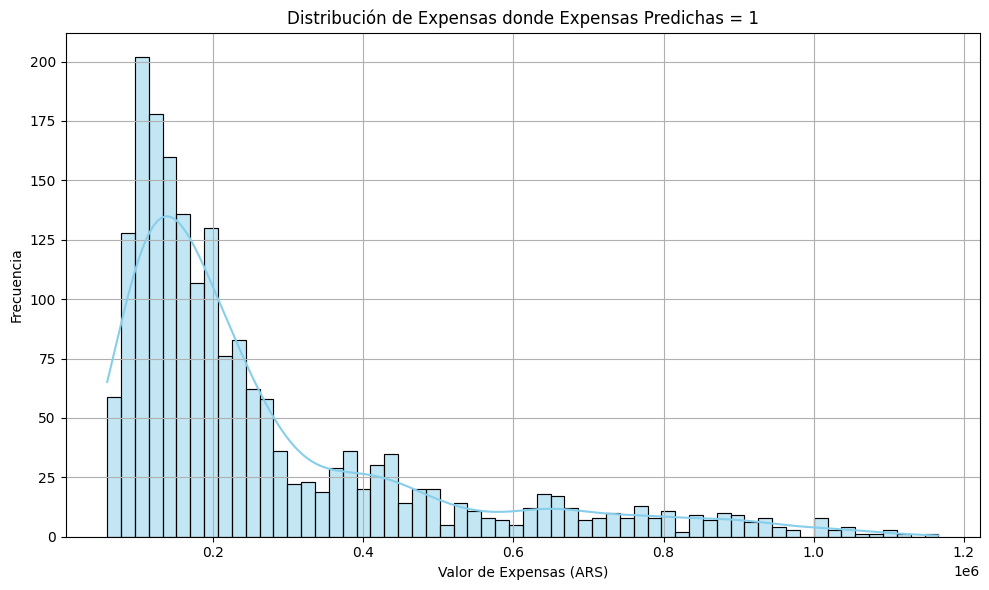

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los casos donde Expensas Predichas == 1
df_filtrado = df[df['Expensas Predichas'] == 1].copy()

# Convertir Expensas a numérico (por si quedan strings)
df_filtrado['Expensas'] = pd.to_numeric(df_filtrado['Expensas'], errors='coerce')

# Eliminar nulos para el gráfico
expensas_validas = df_filtrado['Expensas'].dropna()

# Graficar
plt.figure(figsize=(10, 6))
sns.histplot(expensas_validas, bins=60, kde=True, color='skyblue')
plt.title('Distribución de Expensas donde Expensas Predichas = 1')
plt.xlabel('Valor de Expensas (ARS)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


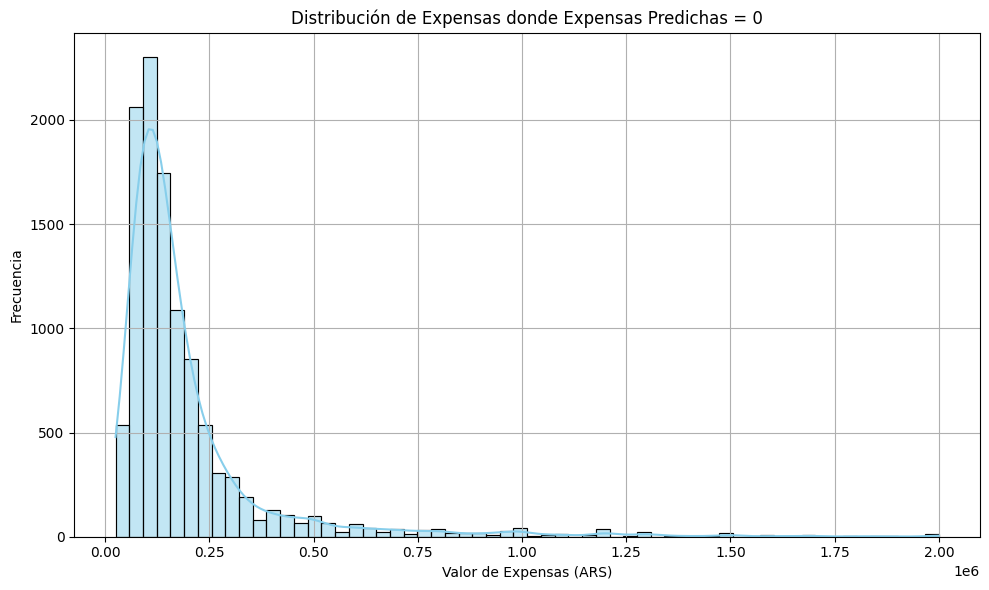

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los casos donde Expensas Predichas == 1
df_filtrado = df[df['Expensas Predichas'] == 0].copy()

# Convertir Expensas a numérico (por si quedan strings)
df_filtrado['Expensas'] = pd.to_numeric(df_filtrado['Expensas'], errors='coerce')

# Eliminar nulos para el gráfico
expensas_validas = df_filtrado['Expensas'].dropna()

# Graficar
plt.figure(figsize=(10, 6))
sns.histplot(expensas_validas, bins=60, kde=True, color='skyblue')
plt.title('Distribución de Expensas donde Expensas Predichas = 0')
plt.xlabel('Valor de Expensas (ARS)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


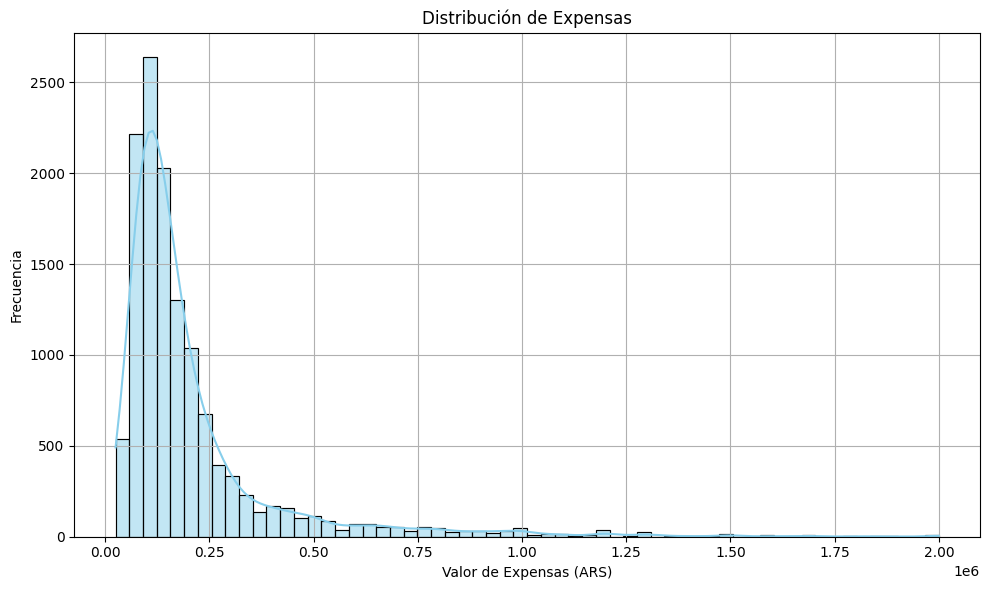

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los casos donde Expensas Predichas == 1
df_filtrado = df

# Convertir Expensas a numérico (por si quedan strings)
df_filtrado['Expensas'] = pd.to_numeric(df_filtrado['Expensas'], errors='coerce')

# Eliminar nulos para el gráfico
expensas_validas = df_filtrado['Expensas'].dropna()

# Graficar
plt.figure(figsize=(10, 6))
sns.histplot(expensas_validas, bins=60, kde=True, color='skyblue')
plt.title('Distribución de Expensas')
plt.xlabel('Valor de Expensas (ARS)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Dataset Limpio